<a href="https://colab.research.google.com/github/tahmuch/ARTificial-Intelligence/blob/master/Muchabaiwa_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tafadzwa Muchabaiwa - 24/03818**

Assignment 2 - Text Analytics

9306 Advances in Cognitive Computing Research

Dr S. Mwendia

**Introduction**

The dataset is from Twitter and it reveals the sentiments bout the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Loading the necessary Libraries**

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
!pip install nltk wordcloud matplotlib networkx spacy gensim pyLDAvis
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
import spacy
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
!pip install pyLDAvis
import pyLDAvis.gensim_models
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load data
with open('Tweets.csv', 'r', encoding='utf-8') as file:
    text = file.read()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data Preprocessing**




In [ ]:
# Tokenize text
tokens = nltk.word_tokenize(text.lower())
tokens = [word for word in tokens if word.isalpha()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Under data preprocessing, we firstly Tokenize the text so as to break the text into smaller parts for easier machine analysis, helping machines understand human language. Tokenization, in the realm of Natural Language Processing (NLP) and machine learning, refers to the process of converting a sequence of text into smaller parts, known as tokens.

In [ ]:
# Stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Stopwords are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information.

**1. Word Frequency**



In [ ]:
# Word Frequency
freq_dist = nltk.FreqDist(tokens)
word_freq = pd.DataFrame(freq_dist.most_common(20), columns=['Word', 'Frequency'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word Frequency is a technique that involves counting how often each word appears in a given collection of text data, such as documents, articles, or web pages. It helps identify the most frequently occurring words and their frequencies.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


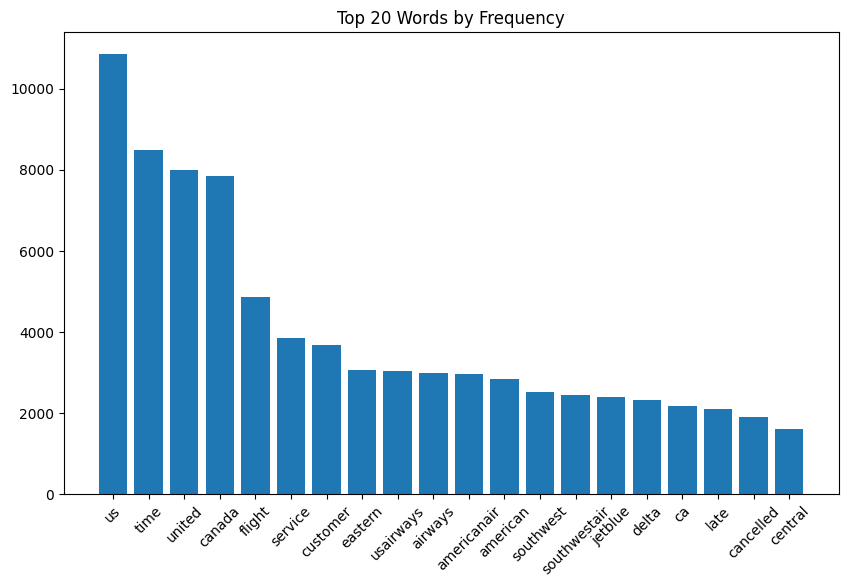

In [ ]:
# Plot Word Frequency
plt.figure(figsize=(10, 6))
plt.bar(word_freq['Word'], word_freq['Frequency'])
plt.xticks(rotation=45)
plt.title('Top 20 Words by Frequency')
plt.show()

From our Dataset, we can see that the word US, whic in this case is the abreviation for the United States (of America), is the most prevelant word in the dataset. This is expected for a dataset that includes sentiments about the service customers received from Airlines in the United States.

Time, United, Canada and Flight are the next most frequently used words in he dataset.

**Word Cloud**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


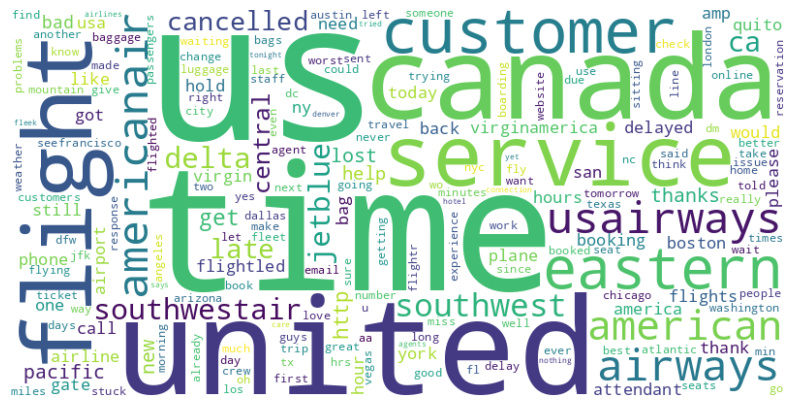

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word cloud s a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.

From our word cloud, we can see that the 3 frequently used words in the dataset are US, Time and United. The word cloud provides a simplified pictorial view of key words used in the datset.

**2. Collocation**

In [ ]:
# Collocation
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)
finder.apply_freq_filter(3)
collocations = finder.nbest(bigram_measures.pmi, 10)
collocation_df = pd.DataFrame(collocations, columns=['Word 1', 'Word 2'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coloocations are phrases or expressions containing multiple words, that are highly likely to co-occur.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25913 (\N{CJK UNIFIED IDEOGRAPH-6539}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21892 (\N{CJK UNIFIED IDEOGRAPH-5584}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


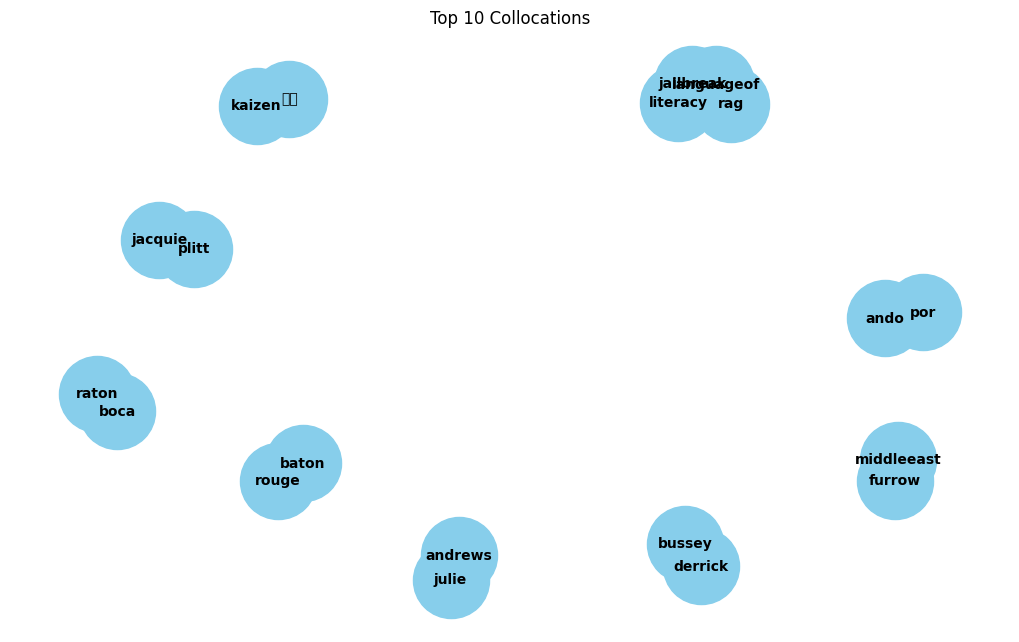

In [ ]:
# Plot Collocation
G = nx.Graph()
for bigram in collocations:
    G.add_edge(*bigram)
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Top 10 Collocations')
plt.show()

From the tweets dataset, several key words are used together such as baton rogue, ando por and middle east furrow.

**3. Concordance**

In [ ]:
# Concordance
text_nltk = nltk.Text(tokens)
concordance_list = text_nltk.concordance_list('specific_word', width=80, lines=10)
for concord in concordance_list:
    print(' '.join(concord.line))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Concordance is a collection of word locations along with their context. You can use concordances to find: How many times a word appears. Where each occurrence appears.

**4. Word Spotting**

In [ ]:
# Word Spotting
target_word = "specific_word"
word_indices = [i for i, word in enumerate(tokens) if word == target_word]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word spotting  is a branch of speech recognition that deals with the identification of special speech commands or 'keywords' in utterances. With a small footprint size, keyword spotting has a wide scope of applications, such as robotics, virtual assistants, and vehicle mounted electronics

In [ ]:
# Highlight target word in the text
text_with_highlight = " ".join([f"*{word}*" if i in word_indices else word for i, word in enumerate(tokens)])

# Print text with highlighted target word
print(text_with_highlight)

negativereason airline name text virgin america virginamerica dhepburn time us canada virgin america virginamerica plus added commercials experience time us canada virgin america virginamerica today must mean need take another trip lets play central time us canada bad virgin america virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse time us canada ca virgin america virginamerica really big bad thing time us canada ca virgin america virginamerica seriously would pay flight seats playing really bad thing flying va time us canada virgin america virginamerica yes nearly every time fly vx ear worm go away san francisco ca pacific time us canada virgin america virginamerica really missed prime opportunity men without hats parody https los angeles pacific time us canada virgin america virginamerica well san diego pacific time us canada virgin america virginamerica amazing arrived hour early good los angeles eastern time us canada virgin america virg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In the dataset, we can see that the main or key words used include airline name, virgin america, us, canada amongst others. All these words are linked to the airline indusrty within the United States.

**5. Topic Modelling**

In [ ]:
# Topic Modelling
dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Modelling is a popular natural language processing technique used to create structured data from a collection of unstructured data. In other words, the technique enables businesses to learn the hidden semantic patterns portrayed by a text corpus and automatically identify the topics that exist inside it.

In [ ]:
import string
import nltk
!pip install NlpToolkit-Corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'list' object has no attribute 'lower'

In [ ]:
from gensim import corpora

# Creating document-term matrix
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'clean_corpus' is not defined

In [ ]:
# Load the required libraries and associated functions
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Fetch dataset
dataset = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=('headers', 'footers', 'quotes')
)
documents = dataset.data

# Initialise number of topics and features for experiment
no_features = 1000
no_topics = 10 # We choose a sample 10

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=no_features,
    stop_words='english')
!pip install fastcountvectorizer
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

# Run LDA
lda = LatentDirichletAllocation(
    n_components=no_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=0)
lda.fit(tf)

no_top_words = 5 # How many top words to display

# Display top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([tf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'Tweets' is not defined

c) 1. Customer Sentiment Analysis:
Text analytics can be used to analyze customer feedback, reviews, and social media posts to gain insights into customer sentiment towards a product, service, or brand. By applying techniques like sentiment analysis, topic modeling, and emotion detection, businesses can better understand customer perceptions, identify areas for improvement, and tailor their marketing and customer service strategies accordingly.

For example, a company could use text analytics to monitor online reviews of their products, detect recurring themes and sentiments, and identify common pain points or areas of customer satisfaction. This information could then be used to inform product development, customer service initiatives, or targeted marketing campaigns. This applies for this particlar dataset.

2. Content Personalization and Recommendation Systems:
Text analytics can be leveraged to improve content personalization and recommendation systems. By analyzing the textual content of articles, blog posts, product descriptions, or user-generated content, these systems can better understand the topics, themes, and language patterns that are most relevant to individual users.

This information can then be used to personalize the content that is recommended or displayed to users, improving engagement, retention, and the overall user experience. For instance, an e-commerce platform could use text analytics to analyze product descriptions and customer reviews, and then recommend products that are most relevant to a user's interests and preferences.